In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['figure.figsize'] = (12,12)

iris = load_iris()

In [25]:
X, y = iris['data'], iris['target']

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
X.shape

(150, 4)

In [28]:
rng = np.random.RandomState(0)

In [29]:
permutation = rng.permutation(len(X))

In [30]:
len(permutation)

150

In [31]:
X, y = X[permutation], y[permutation]

In [32]:
y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [33]:
classifier = KNeighborsClassifier()

In [34]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []

for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size: (fold+1) * fold_size] = True
    masks.append(test_mask)
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))

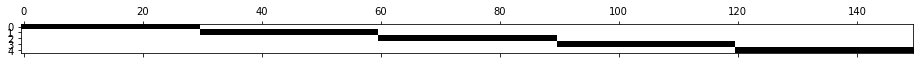

In [35]:
plt.matshow(masks, cmap='gray_r')

In [37]:
np.mean(scores)

0.96

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y)
print(np.mean(scores))

0.9733333333333334


In [39]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

In [40]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [41]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.matshow(masks, cmap='gray_r')

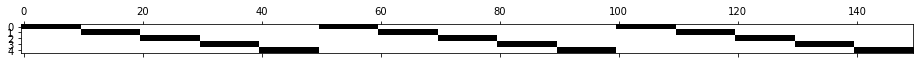

In [44]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

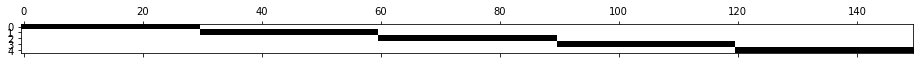

In [45]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

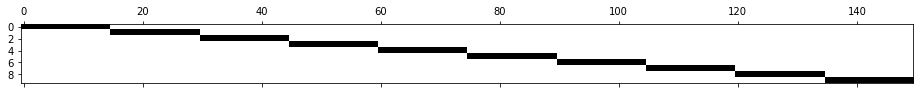

In [47]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

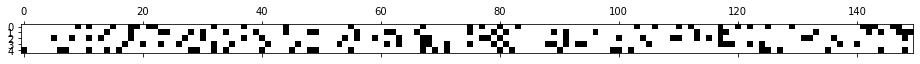

In [49]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

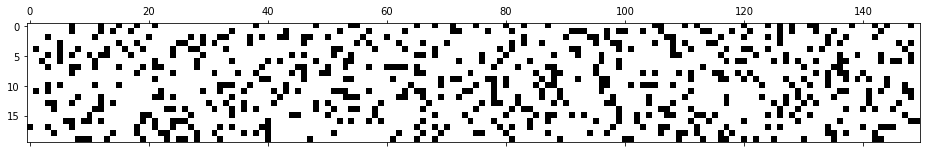

In [50]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

In [51]:
cv = ShuffleSplit(n_splits=5, test_size=.2)

In [52]:
cross_val_score(classifier, iris.data, iris.target, cv=cv)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 0.96666667])

In [53]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

In [55]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

In [56]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [59]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
    'kernel': ['linear']
}

In [60]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

In [61]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['linear']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [63]:
grid_predictions = grid.predict(X_test)

In [64]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.937 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.937 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.987 total time=   0.2s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.937 total time=   0.4s
[CV 2/5] END ..C=1, gamma

[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.1s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.5s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.950 total time=   0.5s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.938 total time=   0.3s
[CV 4/5] END ....C=1, gamma=auto, kernel=linear;, score=0.937 total time=   0.4s
[CV 5/5] END ....C=1, gamma=auto, kernel=linear;, score=0.987 total time=   0.2s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=1.000 total time=   1.4s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.949 total time=   3.2s
[CV 2/5] END ..C=10, gamma=scale, kernel=linear;, score=0.938 total time=   0.8s
[CV 3/5] END ..C=10, gamma=s